In [1]:
%matplotlib inline

In [2]:
# Import pandas and numpy
import pandas as pd
import numpy as np

# Import the statsmodels API
import statsmodels.api as sm

# Import the statsmodels formula API
import statsmodels.formula.api as smf

# Styling
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('phil.csv')

# Add the temperature data into the DataFrame
for i in ['february', 'march', 'april', 'FebruaryMarch', 'MarchApril', 'FebruaryMarchApril']:
    temp = pd.read_csv('%s.csv' % i)
    temp['year'] = temp['Date'].astype(str).str.slice(0,4).astype(int)
    temp[i] = temp['Value']
    df = df.merge(temp[['year', i]], on='year')
    #temp.head()
    
# Create an offset for the year, so 1898 is 0, 1899 is 1 and so on
df['year_offset'] = df['year'] - df['year'].min() + 1

# Take out the effect of global warming and the baseline temperature, so we're just left with an offset from 0.
# Negative numbers mean it's colder than average, positive means it's warmer.
for i in ['february', 'march', 'april', 'FebruaryMarch', 'MarchApril', 'FebruaryMarchApril']:
    cycle, trend = sm.tsa.filters.hpfilter(df['%s' % i], lamb = 100000)
    df['%s_offset' % i] = cycle
    
    # Assign a class. 1 = 6 more weeks of winter, 2 = early spring
    df['%s_class' % i] = 1
    df.loc[df['%s_offset' % i] > 0, '%s_class' % i] = 2
    
df.head()

,year,result,february,march,april,FebruaryMarch,MarchApril,FebruaryMarchApril,year_offset,february_offset,...,march_offset,march_class,april_offset,april_class,FebruaryMarch_offset,FebruaryMarch_class,MarchApril_offset,MarchApril_class,FebruaryMarchApril_offset,FebruaryMarchApril_class
0,1895,No Record,17.0,31.3,46.9,24.2,39.1,31.7,1,-6.197919,...,-3.966631,1,0.384293,2,-5.030636,1,-1.788573,1,-3.282956,1
1,1896,No Record,26.6,27.8,51.0,27.2,39.4,35.1,2,3.305202,...,-7.481231,1,4.487802,2,-2.086163,1,-1.494110,1,0.080851,2
2,1897,No Record,27.9,36.9,46.7,32.4,41.8,37.2,3,4.508385,...,1.604209,2,0.191307,2,3.058360,2,0.900371,2,2.144691,2
3,1898,Saw Shadow,26.7,42.0,43.5,34.4,42.8,37.4,4,3.211658,...,6.689803,2,-3.005241,1,5.003004,2,1.894902,2,2.308595,2
4,1899,No Record,20.0,34.0,48.6,27.0,41.3,34.2,5,-3.584993,...,-1.324351,1,2.098109,2,-2.452189,1,0.389509,2,-0.927425,1


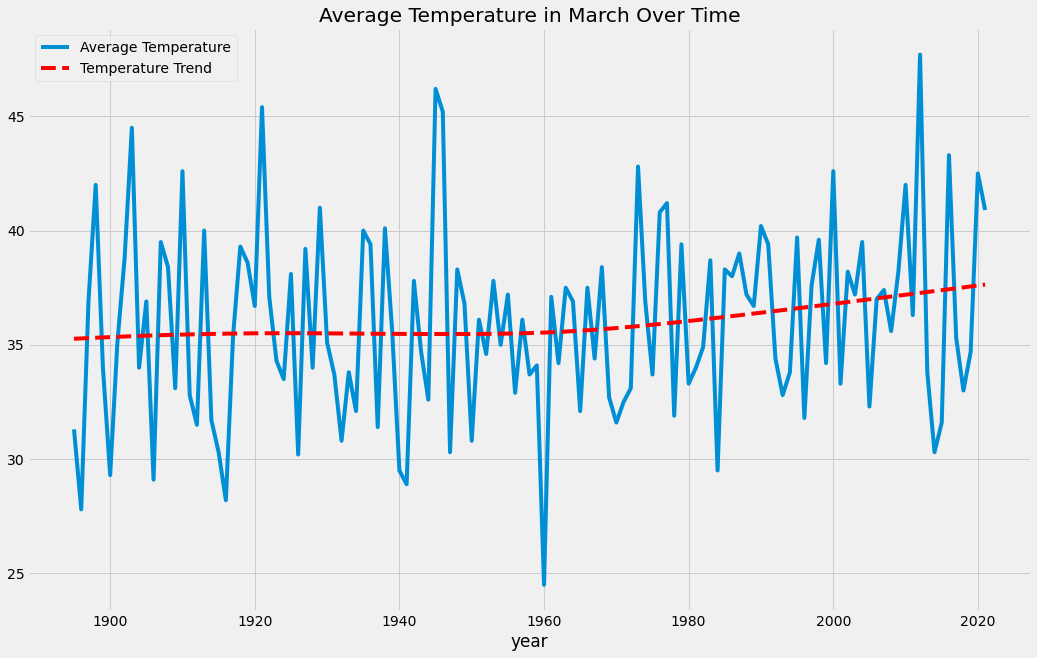

In [4]:
# Plot temperature trend
figure, ax = plt.subplots(figsize=(16,10))

df.plot('year', 'march', title='Average Temperature in March Over Time', ax=ax, label='Average Temperature')

cycle, trend = sm.tsa.filters.hpfilter(df['march'], lamb = 100000)
ax.plot(df['year'], trend, 'r--', label='Temperature Trend')
ax.legend()

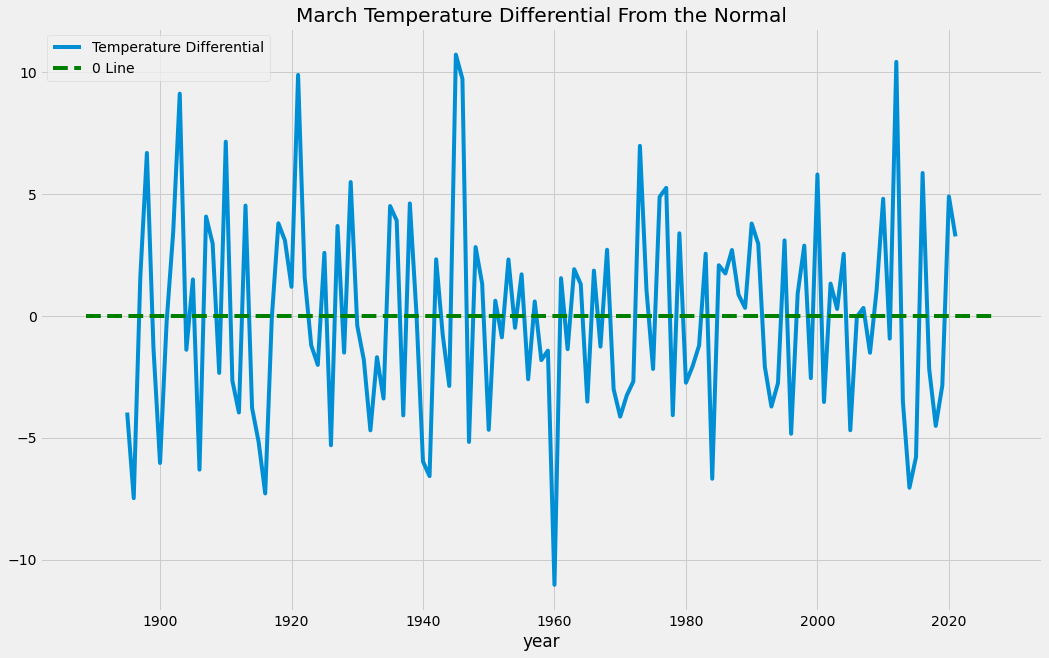

In [5]:
# Plot calculated offsets

figure, ax = plt.subplots(figsize=(16,10))

df.plot('year', 'march_offset', title='March Temperature Differential From the Normal', ax=ax, label='Temperature Differential')
ax.plot(ax.get_xlim(), [0,0], 'g--', label='0 Line')
ax.legend()

In [6]:
# We only care about years where we have a result.
df.loc[df['result'] == 'Saw Shadow', 'result'] = '6 more weeks of winter'
df.loc[df['result'] == 'No Shadow', 'result'] = 'Early spring'
df = df[(df['result'] == '6 more weeks of winter') | (df['result'] == 'Early spring')]

df.head()

,year,result,february,march,april,FebruaryMarch,MarchApril,FebruaryMarchApril,year_offset,february_offset,...,march_offset,march_class,april_offset,april_class,FebruaryMarch_offset,FebruaryMarch_class,MarchApril_offset,MarchApril_class,FebruaryMarchApril_offset,FebruaryMarchApril_class
3,1898,6 more weeks of winter,26.7,42.0,43.5,34.4,42.8,37.4,4,3.211658,...,6.689803,2,-3.005241,1,5.003004,2,1.894902,2,2.308595,2
5,1900,6 more weeks of winter,24.1,29.3,46.8,26.7,38.0,33.4,6,0.418382,...,-6.038220,1,0.301335,2,-2.807230,1,-2.915806,1,-1.763382,1
6,1901,6 more weeks of winter,18.9,35.1,45.0,27.0,40.0,33.0,7,-4.878229,...,-0.251761,1,-1.495605,1,-2.562104,1,-0.921040,1,-2.199279,1
7,1902,Early spring,21.0,38.8,46.1,29.9,42.4,35.3,8,-2.874842,...,3.435132,2,-0.392755,1,0.283234,2,1.473837,2,0.064897,2
8,1903,6 more weeks of winter,28.0,44.5,46.6,36.2,45.6,39.7,9,4.028574,...,9.122568,2,0.109856,2,6.528851,2,4.668863,2,4.429184,2


In [7]:
# Run OLS regression to see if Phil's predictions are ever statistically significant:

for i in ['february', 'march', 'april', 'FebruaryMarch', 'MarchApril', 'FebruaryMarchApril']:
    # Run regression.  Note the call to `fit()` after the call to `ols`.
    mod = smf.ols(formula='%s_offset ~ C(result)' % i, data = df).fit()

    # Print the regression results if significant
    if mod.pvalues[1] <= .05:
        print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:           april_offset   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     4.904
Date:                Thu, 21 Apr 2022   Prob (F-statistic):             0.0287
Time:                        18:59:33   Log-Likelihood:                -281.16
No. Observations:                 121   AIC:                             566.3
Df Residuals:                     119   BIC:                             571.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

(1888.0, 2024.0)

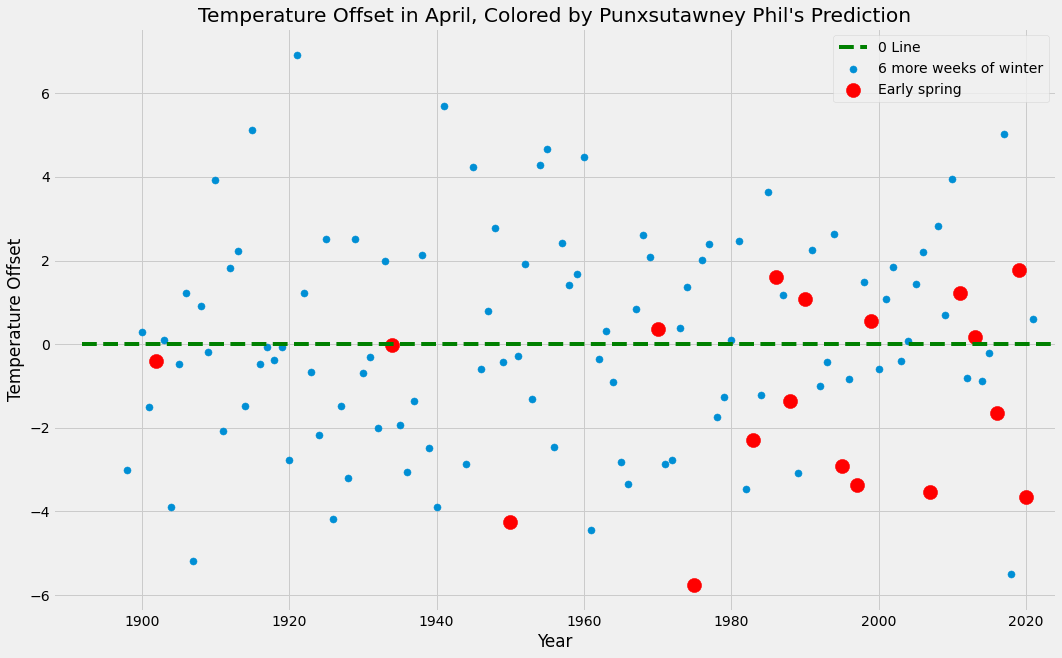

In [8]:
figure, ax = plt.subplots(figsize=(16,10))
ax.scatter(
    df['year'][df['result'] == '6 more weeks of winter'], 
    df['april_offset'][df['result'] == '6 more weeks of winter'],
    label='6 more weeks of winter', s=50
)
ax.scatter(
    df['year'][df['result'] == 'Early spring'], 
    df['april_offset'][df['result'] == 'Early spring'],
    label='Early spring', s=200, c='red'
)
ax.plot(ax.get_xlim(), [0,0], 'g--', label='0 Line')
ax.legend()
ax.set_title('Temperature Offset in April, Colored by Punxsutawney Phil\'s Prediction')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature Offset')
ax.set_xlim([1888,2024])

(1888.0, 2024.0)

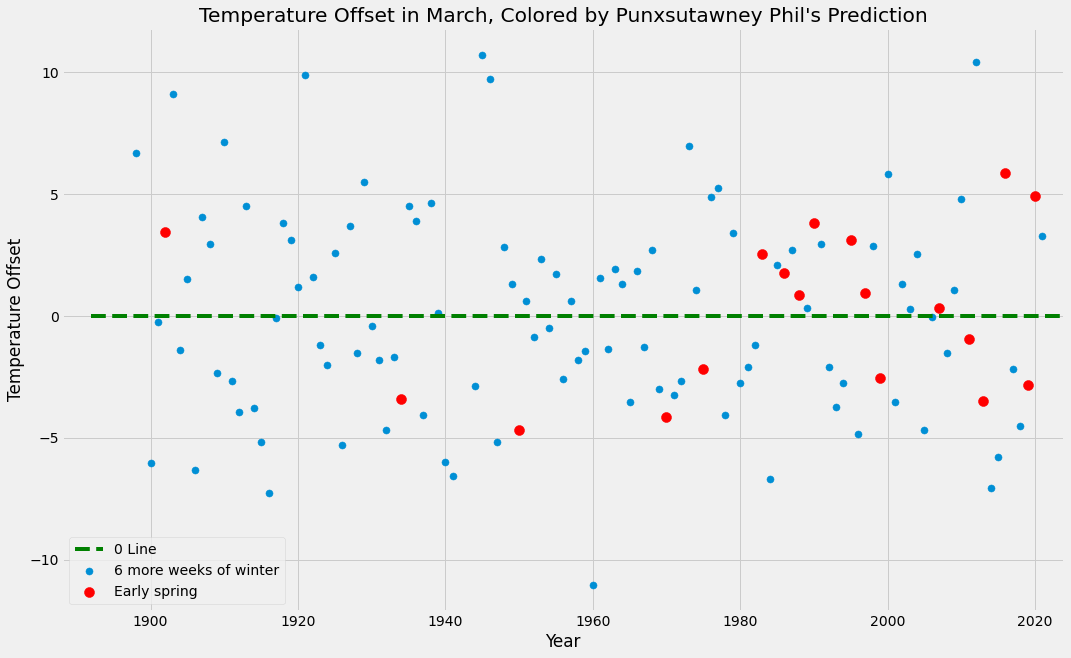

In [9]:
figure, ax = plt.subplots(figsize=(16,10))
ax.scatter(
    df['year'][df['result'] == '6 more weeks of winter'], 
    df['march_offset'][df['result'] == '6 more weeks of winter'],
    label='6 more weeks of winter', s=50
)
ax.scatter(
    df['year'][df['result'] == 'Early spring'], 
    df['march_offset'][df['result'] == 'Early spring'],
    label='Early spring', s=100, c='red'
)
ax.plot(ax.get_xlim(), [0,0], 'g--', label='0 Line')
ax.legend()
ax.set_title('Temperature Offset in March, Colored by Punxsutawney Phil\'s Prediction')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature Offset')
ax.set_xlim([1888,2024])

In [10]:
# Load the predictions for the rest of the groudhogs and clean the data

d = pd.read_csv('hogs.csv', sep='\t')
d['result'] = d['result'].str.extract('(.*)\[.*\]')
d['year'] = d['year'].astype(int)
d['name'] = d['name'].str.strip().str.replace(' ', '_')
d['name'] = d['name'].str.strip().str.replace('-', '_')
d = d[(d['result'] == '6 more weeks of winter') | (d['result'] == 'Early spring')]
names = d['name'].unique()
d.head()

,year,result,name,location
0,2016,Early spring,Balzac_Billy,"Balzac, Alberta"
1,2016,6 more weeks of winter,Buckeye_Chuck,"Marion, Ohio"
2,2016,Early spring,Chattanooga_Chuck,"Chattanooga, Tennessee"
3,2016,6 more weeks of winter,Chesapeake_Chuck,"Newport News, Virginia"
4,2016,Early spring,Chuckles,"Manchester, Connecticut"


In [11]:
# Convert it into a DataFrame having dummy variables for each of the differnt groudhogs

all_hogs = pd.get_dummies(d, columns=['name'], prefix='', prefix_sep='')

# Indicate early spring predictions with a 2.  6 more weeks of winter will be a 1.  0 means no prediction for that year
all_hogs.loc[all_hogs['result'] == 'Early spring', names] *= 2
all_hogs = all_hogs.groupby('year', as_index=False).sum()
all_hogs = df.merge(all_hogs, on='year')

all_hogs

,year,result,february,march,april,FebruaryMarch,MarchApril,FebruaryMarchApril,year_offset,february_offset,...,Susquehanna_Sherman,T_Boy_the_Nutria,Tumbleweed,Uni,Western_Maryland_Murray,Wiarton_Willie,Winnipeg_Willow,Woodstock_Willie,Woody,Wynter_the_Groundhog
0,2008,6 more weeks of winter,27.7,35.6,51.2,31.6,43.4,38.2,114,-0.976908,...,0,0,0,0,0,2,0,0,0,0
1,2009,6 more weeks of winter,29.6,38.2,49.1,33.9,43.6,39.0,115,0.873311,...,0,0,0,0,0,1,0,1,0,0
2,2010,6 more weeks of winter,25.8,42.0,52.4,33.9,47.2,40.1,116,-2.976828,...,0,0,0,2,0,1,0,2,0,0
3,2011,Early spring,28.6,36.3,49.7,32.4,43.0,38.2,117,-0.227345,...,2,2,2,1,1,2,0,0,1,0
4,2012,6 more weeks of winter,34.3,47.7,47.7,41.0,47.7,43.2,118,5.421770,...,2,2,0,1,1,2,0,2,2,2
5,2013,Early spring,27.4,33.8,48.7,30.6,41.2,36.6,119,-1.529473,...,1,2,0,0,1,2,2,0,2,0
6,2014,6 more weeks of winter,22.8,30.3,47.7,26.6,39.0,33.6,120,-6.181115,...,2,0,0,0,0,0,2,0,0,0
7,2015,6 more weeks of winter,16.1,31.6,48.4,23.8,40.0,32.0,121,-12.933184,...,2,2,0,1,1,2,2,1,1,0
8,2016,Early spring,30.7,43.3,47.0,37.0,45.2,40.3,122,1.614355,...,0,2,0,0,0,1,0,2,0,0


In [12]:
# Run OLS on all the differnt groudhogs individually

for hog in d.dropna()['name'].unique():
    for i in ['february', 'march', 'april', 'FebruaryMarch', 'MarchApril', 'FebruaryMarchApril']:
        mod = smf.ols(formula='%s_offset ~ C(%s)' % (i, hog), data = all_hogs[all_hogs[hog] > 0]).fit()

        # Print the regression results
        if len(mod.pvalues) > 1 and mod.pvalues[1] <= .05:
            print(mod.summary())

C:\Users\Suma Marri\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:        february_offset   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     20.88
Date:                Thu, 21 Apr 2022   Prob (F-statistic):             0.0447
Time:                        18:59:34   Log-Likelihood:                -8.5220
No. Observations:                   4   AIC:                             21.04
Df Residuals:                       2   BIC:                             19.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -12.9332      2.881  

C:\Users\Suma Marri\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\Suma Marri\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:           march_offset   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     23.99
Date:                Thu, 21 Apr 2022   Prob (F-statistic):             0.0163
Time:                        18:59:34   Log-Likelihood:                -10.771
No. Observations:                   5   AIC:                             25.54
Df Residuals:                       3   BIC:                             24.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -4.3224 

C:\Users\Suma Marri\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [13]:
# Try a machine learning algorithm using all the predictions together.


from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

for m in ['february', 'march', 'april', 'FebruaryMarch', 'MarchApril', 'FebruaryMarchApril']:
    results = []

    for i in range(1000):
        train_x, test_x, train_y, test_y = train_test_split(all_hogs[names], all_hogs['%s_class' % m], test_size=0.1)

        mod = SVC(kernel='poly', degree=3)
        mod.fit(train_x, train_y)
        results.append(mod.score(test_x, test_y))

    print(m)
    print('*'* 20)
    print('prediction score:', np.array(results).mean())
    print('naive score:', max((all_hogs['%s_class' % m] == 1).sum() / 9, 1 - (all_hogs['%s_class' % m] == 1).sum() / 9))
    print('*'* 20)

february
********************
prediction score: 0.659
naive score: 0.6666666666666666
********************
march
********************
prediction score: 0.339
naive score: 0.5555555555555556
********************
april
********************
prediction score: 0.673
naive score: 0.5555555555555556
********************
FebruaryMarch
********************
prediction score: 0.327
naive score: 0.5555555555555556
********************
MarchApril
********************
prediction score: 0.669
naive score: 0.6666666666666667
********************
FebruaryMarchApril
********************
prediction score: 0.667
naive score: 0.6666666666666667
********************


Text(0, 0.5, 'Y')

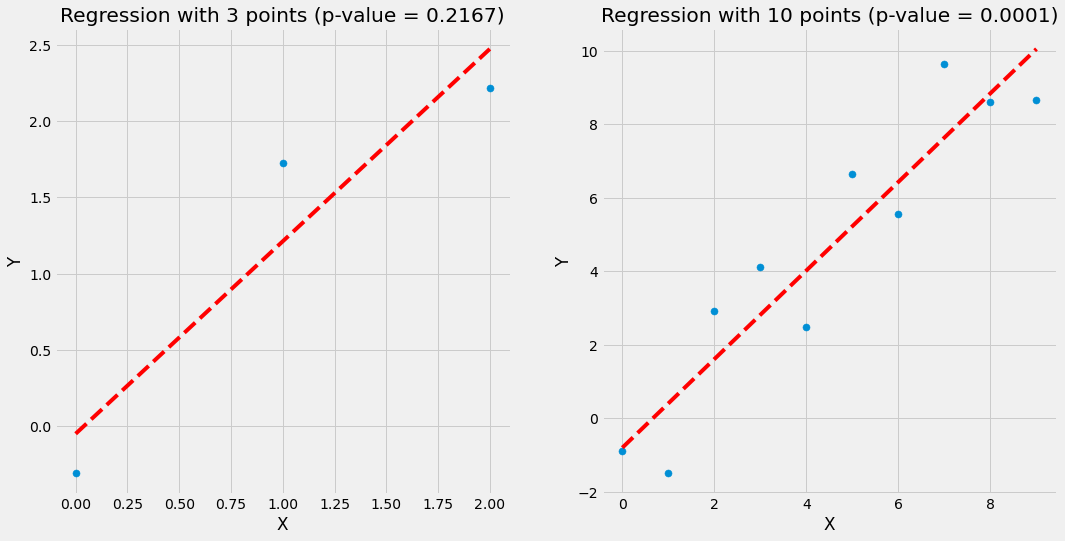

In [14]:
np.random.seed(6)
figure, ((ax0, ax1)) = plt.subplots(figsize=(16,8), nrows=1, ncols=2)

size = 3
x = np.arange(size)
noise = np.random.randn(size)
y = x + noise
d = {'x': x, 'y': y}
mod = smf.ols(formula='y ~ x', data = d).fit()

ax0.scatter(x, y, s=50)
r = mod.params[0] + mod.params[1] * x
ax0.plot(x,r, 'r--')
ax0.set_title('Regression with 3 points (p-value = %0.4f)' % mod.pvalues[1])
ax0.set_xlabel('X')
ax0.set_ylabel('Y')

size = 10
x = np.arange(size)
noise = np.random.randn(size)
y = x + noise
d = {'x': x, 'y': y}
mod = smf.ols(formula='y ~ x', data = d).fit()

ax1.scatter(x, y, s=50)
r = mod.params[0] + mod.params[1] * x
ax1.plot(x,r, 'r--')
ax1.set_title('Regression with 10 points (p-value = %0.4f)' % mod.pvalues[1])
ax1.set_xlabel('X')
ax1.set_ylabel('Y')